# Algorithms Exercise 1

## Imports

In [206]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [207]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    string = s.split()
    if type(stop_words) == str:
        stop_words = stop_words.split()
    for x in range(len(string)):
        for a in string[x]:
            for b in punctuation:
                if a == b:
                    string[x]= string[x][:string[x].index(a)]+string[x][string[x].index(a)+1:]

    for c in range(len(string)):
        string[c] = string[c].lower()
    
    if type(stop_words) == list:
        for a in stop_words:
            for x in string:
                if x == a:
                    string = string[:string.index(a)]+string[string.index(a)+1:] 
                
    return string

In [208]:
assert tokenize("This, is the way; that things will end", stop_words='the is') == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [209]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    dic = {}
    for x in range(len(data)):
        if data[x] in dic.keys():  # found syntax on stack overflow
            dic[data[x]] += 1
        else:
            dic[data[x]] = 1
    return dic

In [210]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [211]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    lst = []
    for x in wc:
        lst.append((x,wc[x]))
    
    leest = sorted(lst,key=lambda x: x[1]) #found method on stack overflow
    leest = leest[::-1] 
    return leest
    

In [212]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [213]:
code = open("mobydick_chapter1.txt",'r')
code = code.read()
swc = sort_word_counts(count_words(tokenize(code, stop_words= 'the of and a to in is it that as')))

In [214]:
assert swc[0]==('i',43)
assert len(swc)==843

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

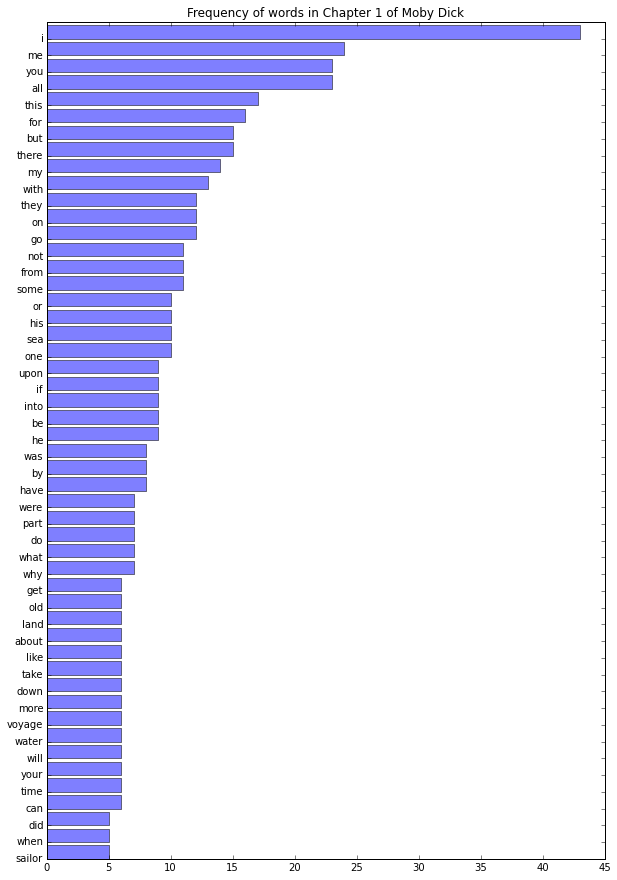

In [215]:
words = []
count = []

x = 0

while x < 50:
    words.append(swc[x][0])
    count.append(swc[x][1])
    x+=1
    

plt.figure(figsize=(10,15))
plt.barh(range(50)[::-1],count, alpha=.5)
plt.yticks(range(50)[::-1], words)
plt.title('Frequency of words in Chapter 1 of Moby Dick')
plt.show()


In [216]:
assert True # use this for grading the dotplot